# Title: Personalized Medical Recommendation System with Machine Learning¶

# Description:

# load dataset & tools

In [6]:
import numpy as  np
import pandas as pd
import openai
import joblib
from flask import Flask, request, jsonify
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


from sklearn.model_selection import KFold ,cross_val_score ,train_test_split,GridSearchCV


from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

import warnings
warnings.filterwarnings('ignore')


############


import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load Dataset
df = pd.read_csv("Training.csv")  # Ensure you have this dataset

# Prepare Data
X = df.drop(columns=["prognosis"])  # Features (symptoms)
y = df["prognosis"]  # Target (disease)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save Model to `.pkl`
joblib.dump(model, "final_model.pkl")
print("✅ Model saved as final_model.pkl")

# ####################

# from fastapi import FastAPI
# import joblib
# import numpy as np
# import pandas as pd

# # Load Data
# medications = pd.read_csv("medications.csv")
# diet_plans = pd.read_csv("diets.csv")
# workouts = pd.read_csv("workout_df.csv")
# precautions = pd.read_csv("precautions_df.csv")

# # Load Trained Model
# model = joblib.load("final_model.pkl")

# # Initialize API
# app = FastAPI()

# @app.get("/")
# def home():
#     return {"message": "Welcome to the AI Disease Chatbot API!"}

# @app.post("/predict/")
# def predict_disease(symptoms: list):
#     """Receive a list of symptoms and return the predicted disease & recommendations."""
#     symptoms_array = np.array([symptoms])  # Convert input to NumPy array
#     predicted_disease = model.predict(symptoms_array)[0]

#     # Get related data
#     medication = medications[medications["Disease"] == predicted_disease]["Medication"].tolist()
#     diet = diet_plans[diet_plans["Disease"] == predicted_disease]["Diet"].tolist()
#     workout = workouts[workouts["Disease"] == predicted_disease]["Workout"].tolist()
#     precaution = precautions[precautions["Disease"] == predicted_disease]["Precaution"].tolist()

#     return {
#         "Predicted Disease": predicted_disease,
#         "Medications": medication,
#         "Diet Plan": diet,
#         "Workout": workout,
#         "Precautions": precaution
#     }




✅ Model saved as final_model.pkl


In [7]:
dataset = pd.read_csv('Training.csv')

In [8]:
dataset.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [9]:
dataset.shape

(4920, 133)

In [10]:
dataset.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
dataset.info

<bound method DataFrame.info of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0

In [12]:
print("describtion of train data (Numerical)")
print("**************************************\n")
dataset.describe().style.background_gradient(cmap='Reds')

describtion of train data (Numerical)
**************************************



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.046341,0.20975

In [13]:
print("describtion of test data (Categoty)")
print("************************************\n")
dataset.describe(include="object").style.background_gradient(cmap='Blues')

describtion of test data (Categoty)
************************************



,prognosis
count,4920
unique,41
top,Fungal infection
freq,120


In [14]:
dataset['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

# Train test split and Label Encoding

In [15]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=20)

In [16]:
x_train.shape, y_train.shape

((1968, 132), (1968,))

# Training top models

### DecisionTreeClassifier

In [17]:
Dtc = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
Dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=9, random_state=42)

In [18]:
y_pred = Dtc.predict(x_test)

[[66  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  0]
 [ 0  0 62 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  0  0 ...  0  0 65]]
Accuracy 93.83468834688347
Cross-validation scores: [0.91624365 0.92639594 0.9213198  0.92875318 0.93384224]
Mean cross-validation score: 0.9253109621420545
Precision: 96.15
Recall: 93.83
F1 Score: 94.48


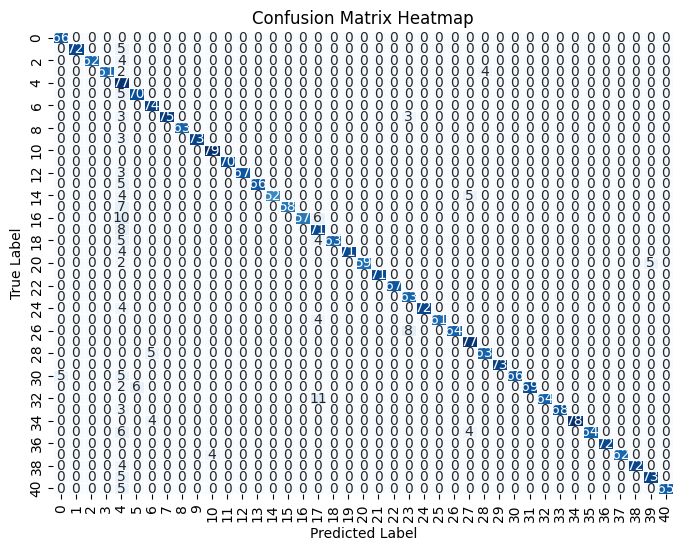

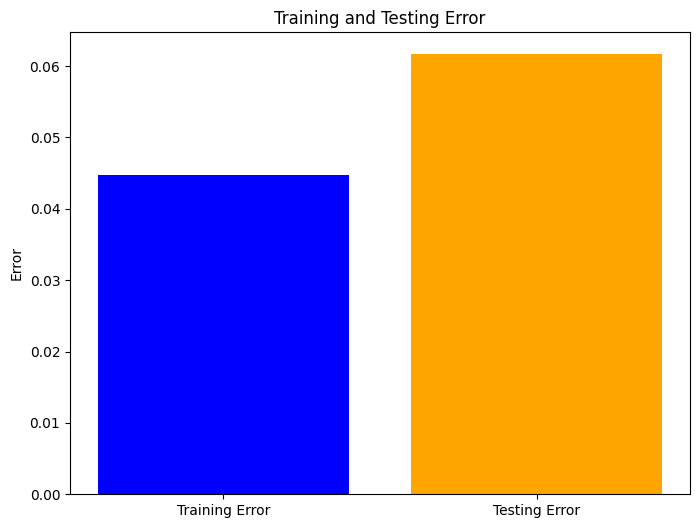

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
scores = cross_val_score(estimator=Dtc, X=x_train, y=y_train, cv=5)  # 5-fold cross-validation

# Output scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}")
print(f"Recall: {recall * 100:.2f}")
print(f"F1 Score: {f1 * 100:.2f}")

# Plotting Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Training and Testing Errors
train_accuracy = Dtc.score(x_train, y_train)
test_accuracy = Dtc.score(x_test, y_test)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy


# Plot Training and Testing Error
errors = [train_error, test_error]
labels = ['Training Error', 'Testing Error']

plt.figure(figsize=(8, 6))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Testing Error')
plt.ylabel('Error')
plt.show()

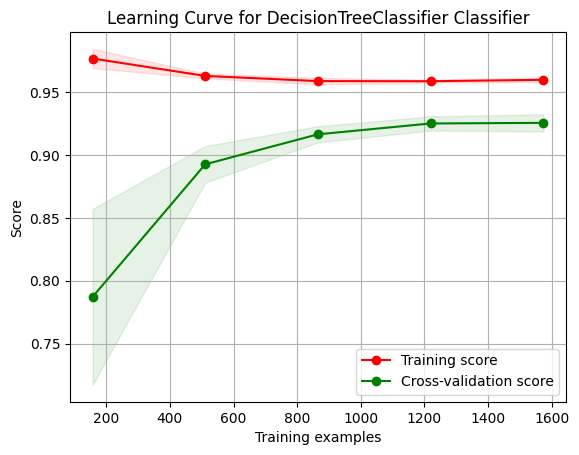

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    Dtc, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve for DecisionTreeClassifier Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the training and cross-validation curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Add legend
plt.legend(loc="best")

# Show plot
plt.show()


### Random Forest

In [21]:
Rf = RandomForestClassifier(n_estimators=50 , max_depth= 5 ,random_state= 42)
Rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

[[66  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 78  0]
 [ 0  0  0 ...  0  0 70]]
Accuracy 93.59756097560977
Cross-validation scores: [0.95177665 0.91624365 0.91624365 0.95165394 0.96946565]
Mean cross-validation score: 0.9410767104532362
Precision: 92.39
Recall: 93.60
F1 Score: 92.51
Cross-validation scores: [0.95177665 0.91624365 0.91624365 0.95165394 0.96946565]
Mean cross-validation score: 0.9410767104532362


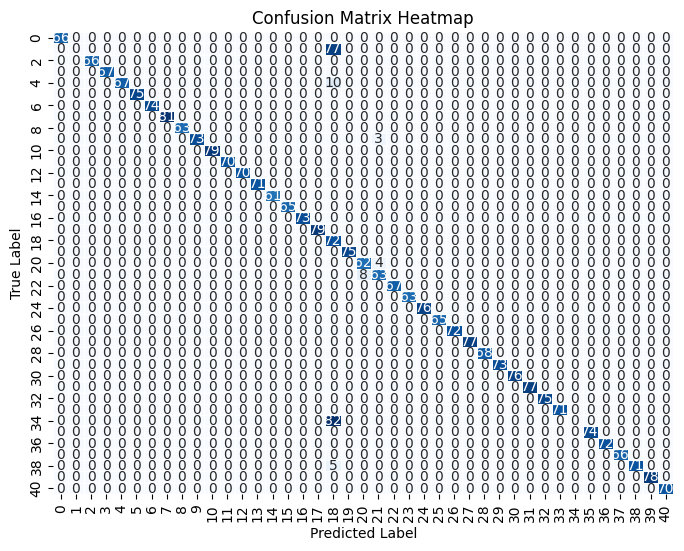

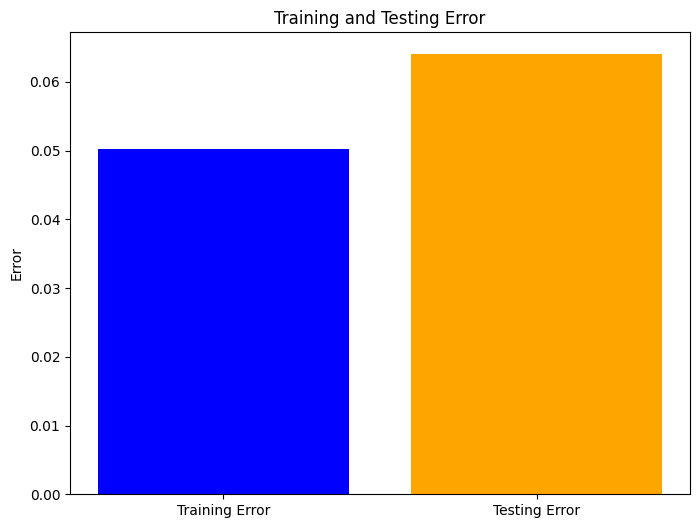

In [22]:
y_pred = Rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
scores = cross_val_score(estimator=Rf, X=x_train, y=y_train, cv=5)  # 5-fold cross-validation

# Output scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}")
print(f"Recall: {recall * 100:.2f}")
print(f"F1 Score: {f1 * 100:.2f}")



# Cross-validation
scores = cross_val_score(estimator=Rf, X=x_train, y=y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Plotting Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Training and Testing Errors
train_accuracy = Rf.score(x_train, y_train)
test_accuracy = Rf.score(x_test, y_test)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Plot Training and Testing Error
errors = [train_error, test_error]
labels = ['Training Error', 'Testing Error']

plt.figure(figsize=(8, 6))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Testing Error')
plt.ylabel('Error')
plt.show()


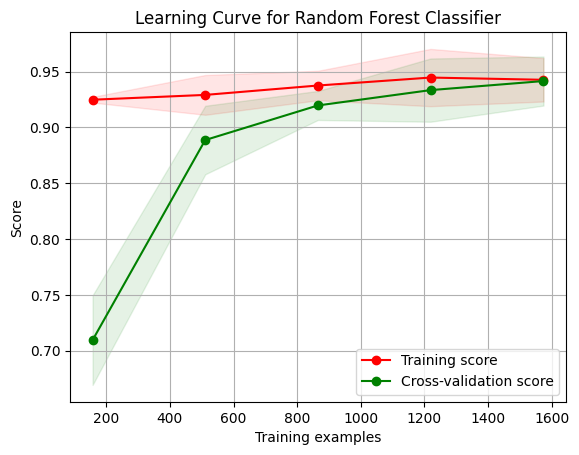

In [23]:
train_sizes, train_scores, test_scores = learning_curve(
    Rf, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve for Random Forest Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the training and cross-validation curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Add legend
plt.legend(loc="best")

# Show plot
plt.show()

### XGBOOST

In [24]:
xgb = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_features=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

[[66  0  0 ...  0  0  0]
 [ 0 77  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  0  0 ...  0  0 70]]
Accuracy 99.32249322493224
Cross-validation scores: [0.98730964 0.97969543 0.9822335  0.98727735 0.97709924]
Mean cross-validation score: 0.9827230338021984
Precision: 99.37
Recall: 99.32
F1 Score: 99.32
Cross-validation scores: [0.98730964 0.97969543 0.9822335  0.98727735 0.97709924]
Mean cross-validation score: 0.9827230338021984


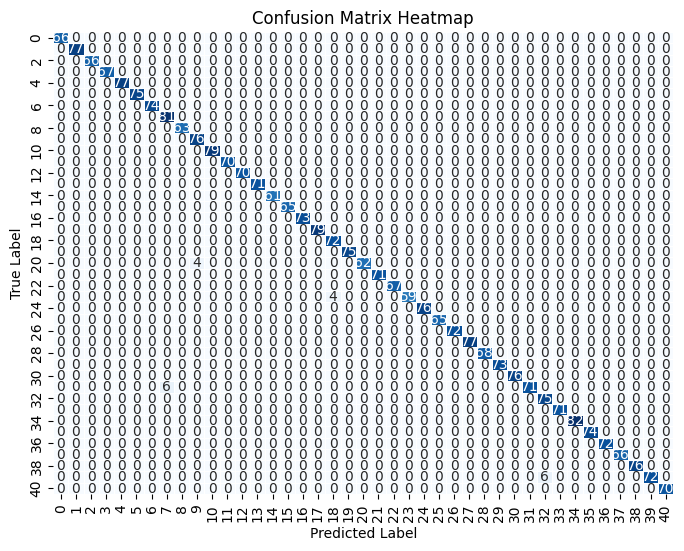

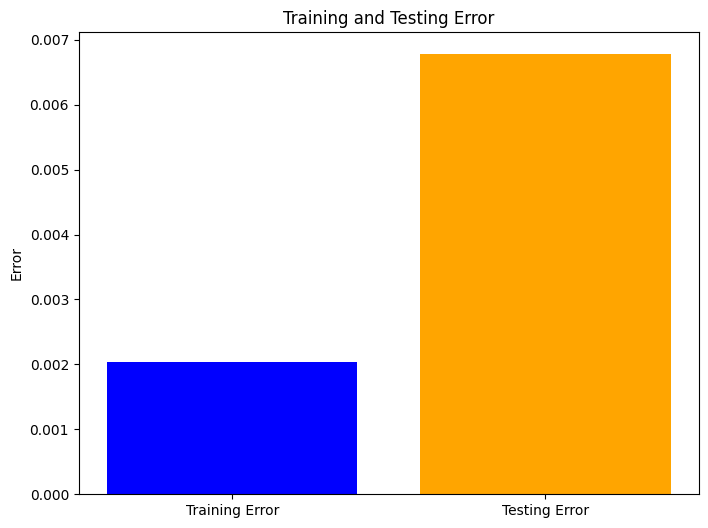

In [25]:
y_pred = xgb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
scores = cross_val_score(estimator=xgb, X=x_train, y=y_train, cv=5)  # 5-fold cross-validation

# Output scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}")
print(f"Recall: {recall * 100:.2f}")
print(f"F1 Score: {f1 * 100:.2f}")

# Cross-validation
scores = cross_val_score(estimator=xgb, X=x_train, y=y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Plotting Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Training and Testing Errors
train_accuracy = xgb.score(x_train, y_train)
test_accuracy = xgb.score(x_test, y_test)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Plot Training and Testing Error
errors = [train_error, test_error]
labels = ['Training Error', 'Testing Error']

plt.figure(figsize=(8, 6))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Testing Error')
plt.ylabel('Error')
plt.show()

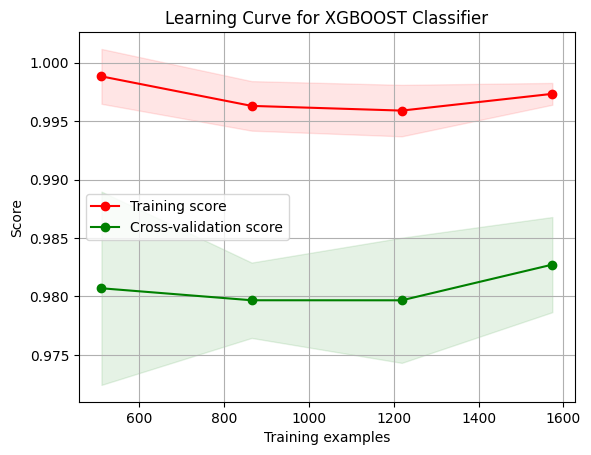

In [26]:
train_sizes, train_scores, test_scores = learning_curve(
    xgb, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve for XGBOOST Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the training and cross-validation curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Add legend
plt.legend(loc="best")

# Show plot
plt.show()

### GradientBoostingClassifier

In [27]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.03, max_depth=2, max_features=3,
                           n_estimators=50, random_state=42)

[[66  0  0 ...  0  0  0]
 [ 0 77  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  0 78  0]
 [ 0  0  0 ...  0  0 70]]
Accuracy 99.39024390243902
Cross-validation scores: [0.99746193 0.98984772 0.98984772 0.99236641 1.        ]
Mean cross-validation score: 0.9939047545239663
Precision: 99.42
Recall: 99.39
F1 Score: 99.39
Cross-validation scores: [0.99746193 0.98984772 0.98984772 0.99236641 1.        ]
Mean cross-validation score: 0.9939047545239663


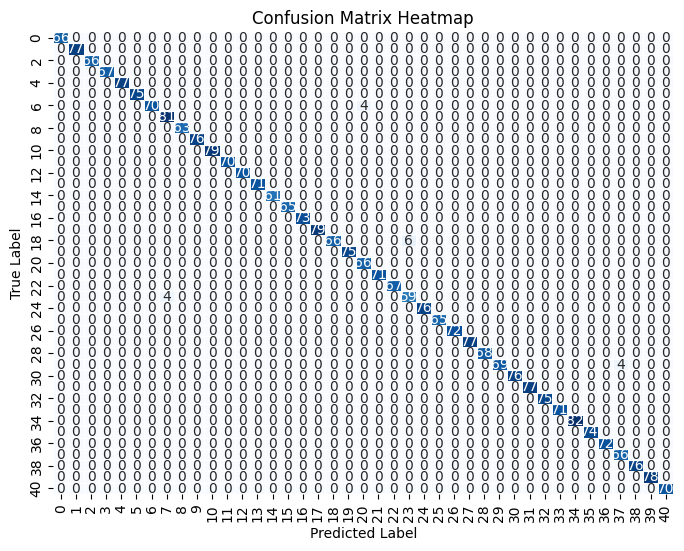

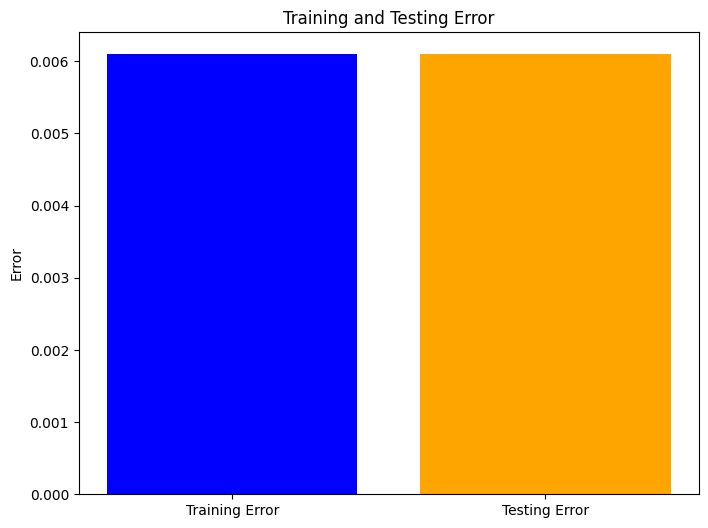

In [28]:
y_pred = gbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
scores = cross_val_score(estimator=gbc, X=x_train, y=y_train, cv=5)  # 5-fold cross-validation

# Output scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}")
print(f"Recall: {recall * 100:.2f}")
print(f"F1 Score: {f1 * 100:.2f}")

# Cross-validation
scores = cross_val_score(estimator=gbc, X=x_train, y=y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Plotting Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Training and Testing Errors
train_accuracy = gbc.score(x_train, y_train)
test_accuracy = gbc.score(x_test, y_test)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Plot Training and Testing Error
errors = [train_error, test_error]
labels = ['Training Error', 'Testing Error']

plt.figure(figsize=(8, 6))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Testing Error')
plt.ylabel('Error')
plt.show()

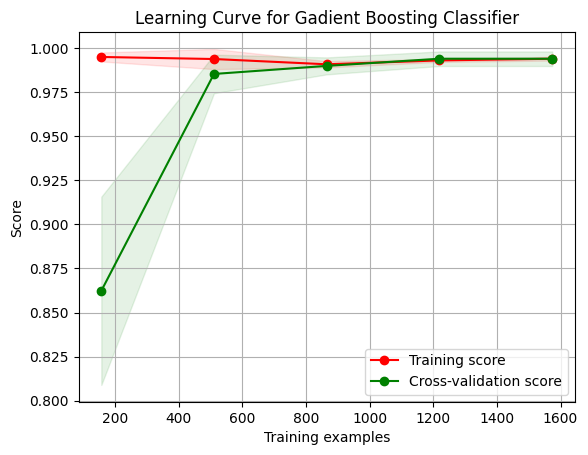

In [29]:
train_sizes, train_scores, test_scores = learning_curve(
    gbc, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve for Gadient Boosting Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the training and cross-validation curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Add legend
plt.legend(loc="best")

# Show plot
plt.show()

### AdaBoostClassifier

In [30]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)
ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=100)

In [31]:
y_pred = ada.predict(x_test)

[[61  0  0 ...  0  0  0]
 [ 0 77  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  0  0 ...  0  0 70]]
Accuracy  97.15447154471545
Cross-validation scores: [0.98477157 0.97969543 0.97208122 0.97455471 0.97201018]
Mean cross-validation score: 0.9766226217692875
Precision: 98.20
Recall: 97.15
F1 Score: 97.42
Cross-validation scores: [0.9822335  0.97715736 0.97208122 0.97455471 0.97201018]
Mean cross-validation score: 0.9756073933428915


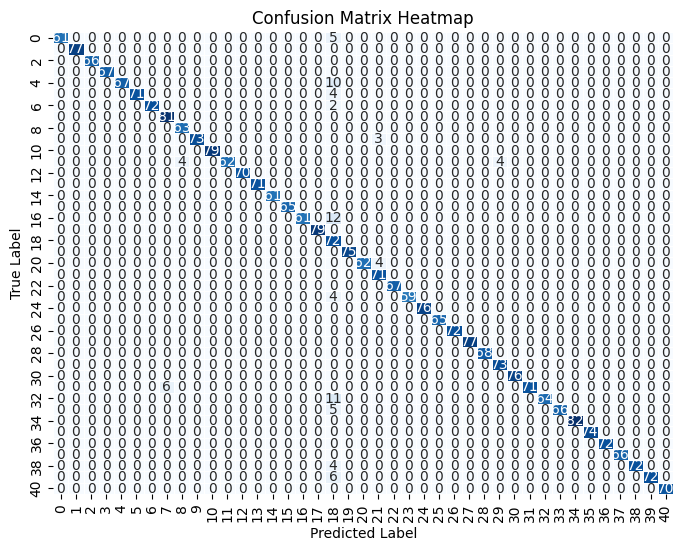

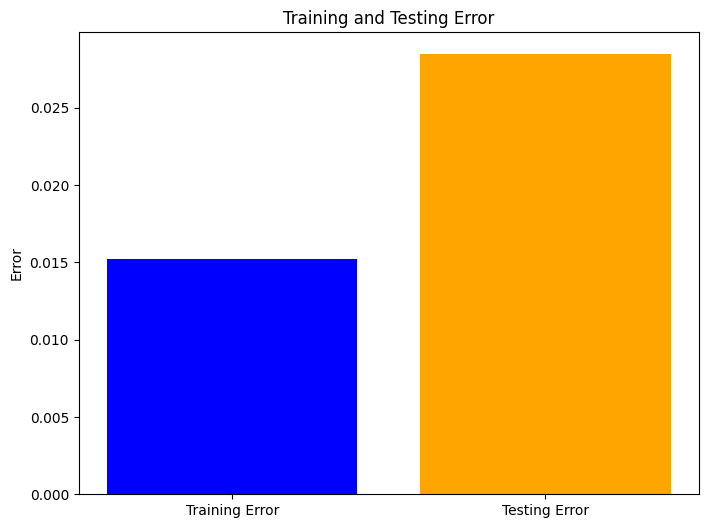

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)

scores = cross_val_score(estimator=ada, X=x_train, y=y_train, cv=5)  # 5-fold cross-validation

# Output scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}")
print(f"Recall: {recall * 100:.2f}")
print(f"F1 Score: {f1 * 100:.2f}")

# Cross-validation
scores = cross_val_score(estimator=ada, X=x_train, y=y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Plotting Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Training and Testing Errors
train_accuracy = ada.score(x_train, y_train)
test_accuracy = ada.score(x_test, y_test)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Plot Training and Testing Error
errors = [train_error, test_error]
labels = ['Training Error', 'Testing Error']

plt.figure(figsize=(8, 6))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Testing Error')
plt.ylabel('Error')
plt.show()

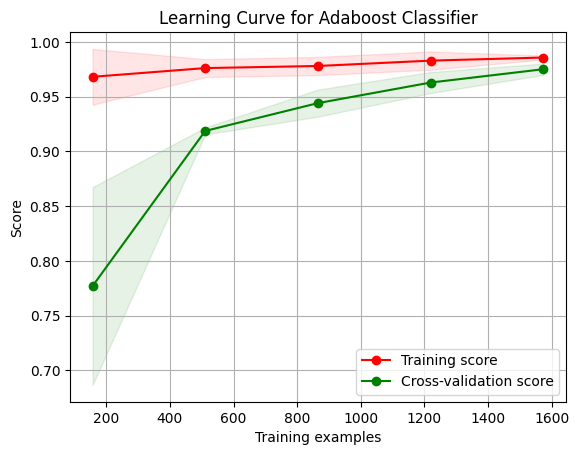

In [33]:
train_sizes, train_scores, test_scores = learning_curve(
    ada, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve for Adaboost Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the training and cross-validation curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Add legend
plt.legend(loc="best")

# Show plot
plt.show()

### Voting

In [34]:
clf1 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
clf2 = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
clf3 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_features=3, max_depth=2)
clf4 = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)

In [35]:
v_clf = VotingClassifier(estimators=[("DecisionTreeClassifier" , clf1) , ('XGBClassifier' , clf2) ,
                                     ("GradientBoostingClassifier" , clf3) ,("AdaBoostClassifier" , clf4)] , voting = "soft")

In [36]:
v_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=9,
                                                     random_state=42)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=Non...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier(learning_rate=0.03,
                                                         max_depth=2,
                                                         max_features=3,
                                                         n_estimators=50,
                                                         random_state=42)),
                             ('AdaBoostClassifier',
                              AdaBoostClassifier(learning_rate=0.02,
                                                 n_estimators=100))],
                 voting='soft')

[[66  0  0 ...  0  0  0]
 [ 0 77  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 78  0]
 [ 0  0  0 ...  0  0 70]]
Accuracy  99.28861788617887
Cross-validation scores: [0.96192893 0.9822335  0.9822335  0.97709924 0.9821883 ]
Mean cross-validation score: 0.977136694178582
Precision: 99.36
Recall: 99.29
F1 Score: 99.29
Cross-validation scores: [0.96192893 0.9822335  0.9822335  0.97709924 0.9821883 ]
Mean cross-validation score: 0.977136694178582


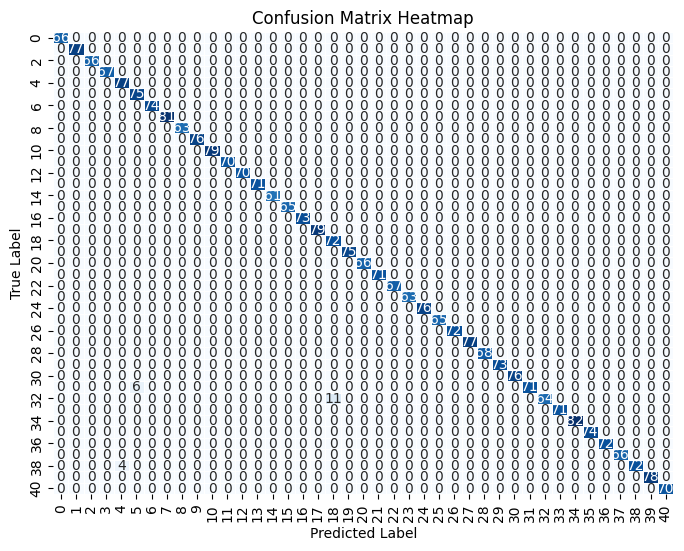

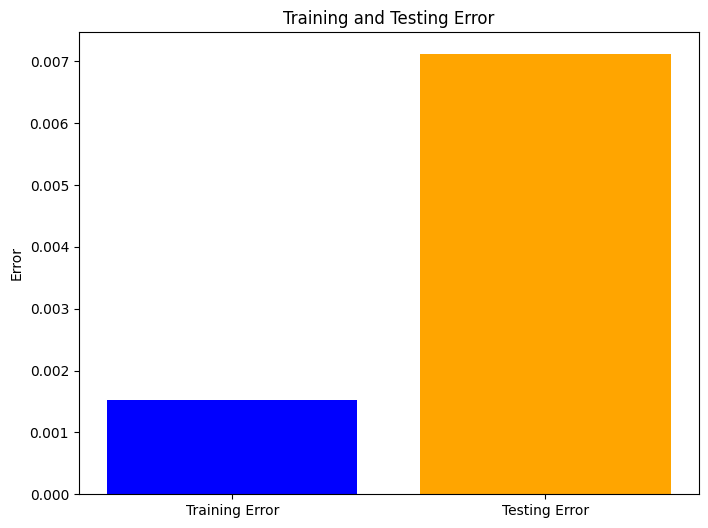

In [37]:
y_pred = v_clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)

scores = cross_val_score(estimator=v_clf, X=x_train, y=y_train, cv=5)  # 5-fold cross-validation

# Output scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}")
print(f"Recall: {recall * 100:.2f}")
print(f"F1 Score: {f1 * 100:.2f}")

# Cross-validation
scores = cross_val_score(estimator=v_clf, X=x_train, y=y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Plotting Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Training and Testing Errors
train_accuracy = v_clf.score(x_train, y_train)
test_accuracy = v_clf.score(x_test, y_test)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Plot Training and Testing Error
errors = [train_error, test_error]
labels = ['Training Error', 'Testing Error']

plt.figure(figsize=(8, 6))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Testing Error')
plt.ylabel('Error')
plt.show()

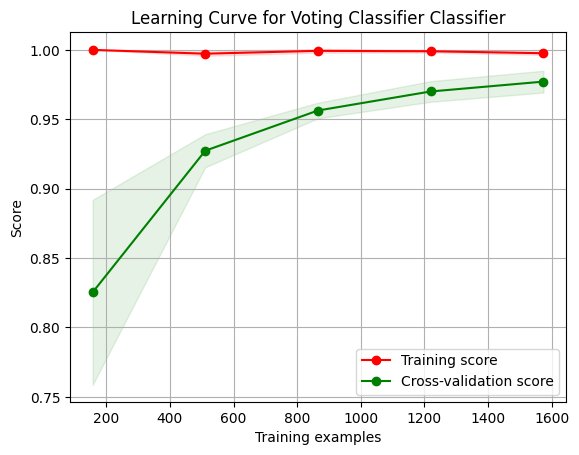

In [38]:
train_sizes, train_scores, test_scores = learning_curve(
    v_clf, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve for Voting Classifier Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the training and cross-validation curves
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Add legend
plt.legend(loc="best")

# Show plot
plt.show()

In [39]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

## Hyperparameter tuning for Random Forest and fit the model

In [40]:
# Reduce the size of the dataset
dataset = dataset.sample(frac=0.5, random_state=20)

# Features and target
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# Encode prognosis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model with the correct variables
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Create a dictionary to store models
models = {
    'RandomForest': best_rf,  # Use the best estimator from GridSearchCV
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")

# Select RandomForest for single prediction
rf = best_rf
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print("RandomForest Accuracy:", accuracy_score(y_test, ypred)*100)

# Save and load the model
# pickle.dump(rf, open('random_forest.pkl', 'wb'))
# rf = pickle.load(open('random_forest.pkl', 'rb'))


# Single prediction test
print("Predicted disease:", rf.predict(X_test.iloc[0].values.reshape(1, -1)))
print("Actual Disease:", y_test[0])


Fitting 3 folds for each of 216 candidates, totalling 648 fits
RandomForest Accuracy: 0.9986449864498645
RandomForest Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 25,  0, ...,  0,  0,  0],
 [ 0,  0, 15, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 16,  0,  0],
 [ 0,  0,  0, ...,  0, 16,  0],
 [ 0,  0,  0, ...,  0,  0, 18]]


RandomForest Accuracy: 99.86449864498645
Predicted disease: [18]
Actual Disease: 18


In [42]:
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[grid_search.predict([input_vector])[0]]




##############################

model = joblib.load('final_model.pkl')

def predict_disease(symptoms):
    """Predict disease based on user symptoms."""
    # Convert symptoms to model-compatible format
    input_data = np.zeros((1, len(model.feature_names_in_)))
    for symptom in symptoms:
        if symptom in model.feature_names_in_:
            input_data[0, np.where(model.feature_names_in_ == symptom)[0][0]] = 1
    
    prediction = model.predict(input_data)
    return prediction[0]

# Initialize Flask app
app = Flask(__name__)

@app.route('/chat', methods=['POST'])
def chat():
    """Handle chatbot conversations."""
    user_input = request.json.get("message")
    
    # Example: Extract symptoms from user input (simple keyword matching for now)
    symptoms = [word for word in user_input.lower().split() if word in model.feature_names_in_]
    
    if symptoms:
        predicted_disease = predict_disease(symptoms)
        response = f"Based on your symptoms, you may have {predicted_disease}. Please consult a doctor for further guidance."
    else:
        response = "I'm not sure about the symptoms provided. Can you be more specific?"
    
    return jsonify({"response": response})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [43]:
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1
    


    ############################




    import pandas as pd
import joblib
import numpy as np
import streamlit as st
from fastapi import FastAPI
import uvicorn
import threading
import requests

### --- 1️⃣ Load Data and Model ---
medications = pd.read_csv("medications.csv")
diet_plans = pd.read_csv("diets.csv")
workouts = pd.read_csv("workout_df.csv")
precautions = pd.read_csv("precautions_df.csv")

# Load Trained Model
model = joblib.load("final_model.pkl")

# Initialize FastAPI
app = FastAPI()

@app.get("/")
def home():
    return {"message": "Welcome to the AI Disease Chatbot API!"}

@app.post("/predict/")
def predict_disease(symptoms: list):
    """Receive a list of symptoms and return the predicted disease & recommendations."""
    symptoms_array = np.array([symptoms])  # Convert input to NumPy array
    predicted_disease = model.predict(symptoms_array)[0]

    # Get related data
    medication = medications[medications["Disease"] == predicted_disease]["Medication"].tolist()
    diet = diet_plans[diet_plans["Disease"] == predicted_disease]["Diet"].tolist()
    workout = workouts[workouts["Disease"] == predicted_disease]["Workout"].tolist()
    precaution = precautions[precautions["Disease"] == predicted_disease]["Precaution"].tolist()

    return {
        "Predicted Disease": predicted_disease,
        "Medications": medication,
        "Diet Plan": diet,
        "Workout": workout,
        "Precautions": precaution
    }

### --- 2️⃣ Function to Run FastAPI in a Thread ---
def run_fastapi():
    uvicorn.run(app, host="127.0.0.1", port=8000)

# Run API in the background
api_thread = threading.Thread(target=run_fastapi, daemon=True)
api_thread.start()

### --- 3️⃣ Streamlit Chatbot UI ---
st.title("🩺 AI Disease Diagnosis Chatbot")

# User input symptoms
user_symptoms = st.text_input("Enter symptoms (comma-separated, e.g., 1,0,1,0,1):")

if st.button("Predict"):
    symptoms_list = [int(s) for s in user_symptoms.split(",")]  # Convert input to list
    response = requests.post("http://127.0.0.1:8000/predict/", json=symptoms_list)
    
    # Display results
    if response.status_code == 200:
        result = response.json()
        st.write(f"🤖 AI Prediction: **{result['Predicted Disease']}**")
        st.write(f"💊 Medications: {', '.join(result['Medications'])}")
        st.write(f"🥗 Diet Plan: {', '.join(result['Diet Plan'])}")
        st.write(f"🏋️ Workout Plan: {', '.join(result['Workout'])}")
        st.write(f"⚠️ Precautions: {', '.join(result['Precautions'])}")
    else:
        st.write("⚠️ Error: Unable to get a response.")



=================predicted disease============
Pneumonia
=================description==================
Pneumonia is an inflammatory condition affecting the air sacs in the lungs.
=================precautions==================
1 :  consult doctor
2 :  medication
3 :  rest
4 :  follow up
=================medications==================
5 :  ['Laxatives', 'Pain relievers', 'Warm baths', 'Cold compresses', 'High-fiber diet']
=================workout==================
6 :  Stay hydrated
7 :  Include nutrient-rich foods
8 :  Consume foods rich in vitamin C and antioxidants
9 :  Include zinc-rich foods
10 :  Limit sugary foods and beverages
11 :  Consume chicken soup
12 :  Consult a healthcare professional
13 :  Rest and conserve energy
14 :  Gradually resume normal diet
15 :  Follow medical recommendations
=================diets==================
16 :  ['Pneumonia Diet', 'High-Calorie Diet', 'Soft and bland foods', 'Hydration', 'Protein-rich foods']


2025-04-02 20:32:40.537 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
INFO:     Started server process [5636]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
2025-04-02 20:32:40.837 
  command:

    streamlit run c:\Users\purna\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-02 20:32:40.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 20:32:40.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 20:32:40.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 20:32:40.842 Thread 'MainThread': missing ScriptRunContext! T

INFO:     127.0.0.1:50972 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:50972 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:50973 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:51021 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:51031 - "GET / HTTP/1.1" 200 OK


In [ ]:
#chills,acidity,fatigue,cough,high_fever,breathlessness,sweating,loss_of_appetite

In [ ]:
#chills,vomiting,high_fever,indigestion,nausea,diarrhoea,muscle_pain
